# Imports and Data

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import os
import matplotlib.pyplot as plt
import phonecalls as pc
import scipy.stats as stats
import scipy.interpolate as interpol
import time
import copy
import math
import pickle


plt.rcParams['figure.figsize'] = (20, 10)
markers = ['o', 'v', 's', 'P', '*', 'X', 'd', 'x', 'D', '2', '+']
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']

with open('unfiltered.pkl', 'rb') as handle:
    unfiltered = pickle.load(handle)
handle.close()

with open('filtered.pkl', 'rb') as handle:
    filtered = pickle.load(handle)
handle.close()

with open('filterednc.pkl', 'rb') as handle:
    filterednc = pickle.load(handle)
handle.close()

import statsmodels.api as sm

globalt0 = dt.datetime.now()

# Supplemental Information

This section recreates all plots for the SI with the data exports to create the plots in TiKz

## Different values of $T$

In [2]:
unfiltered.keys()

dict_keys(['mit', 'uk1', 'uk2', 'uk', 'all'])

In [3]:
t0 = dt.datetime.now()

callT = {}
for c in ['uk', 'uk2', 'mit']:
    df = unfiltered[c]
    callT[c] = {}
    for T in [150, 200, 250, 300]:
        callT[c][T] = df.loc[df['aclock'] <= T]
        uno = pd.DataFrame()
        maxt = max(callT[c][T]['uclock'])
        for ego in callT[c][T]['ego'].unique():
            df1 = callT[c][T].loc[callT[c][T]['ego'] == ego]
            for alter in df1['alter'].unique():
                df2 = df1.loc[df1['alter'] == alter]
                mint = min(df2['uclock'])
                if mint < (maxt - T):
                    df3 = df2.copy()
                    df3['aclock'] = df2['uclock'] - mint
                    uno = uno.append(df3).reset_index(drop=True)
        callT[c][T] = uno
print(f'Took {dt.datetime.now() - t0}')

Took 0:01:46.807342


In [4]:
supA = {}
for c in callT.keys():
    supA[c] = {}
    for T in callT[c].keys():
        dff = pc.get_f(callT[c][T], 'all', 15, (T//3) + 1)
        b = pc.get_b(dff, 'alpha')
        supA[c][T] = pc.plot_g(b, 'alpha')

In [5]:
with open('../itdata/mtl_supA.pickle', 'rb') as handle:
    tmp = pickle.load(handle)
    handle.close()
    
supA['it'] = {}    
for T in tmp.keys():
    b = pc.get_b(tmp[T], 'alpha')
    supA['it'][T] = pc.plot_g(b, 'alpha')

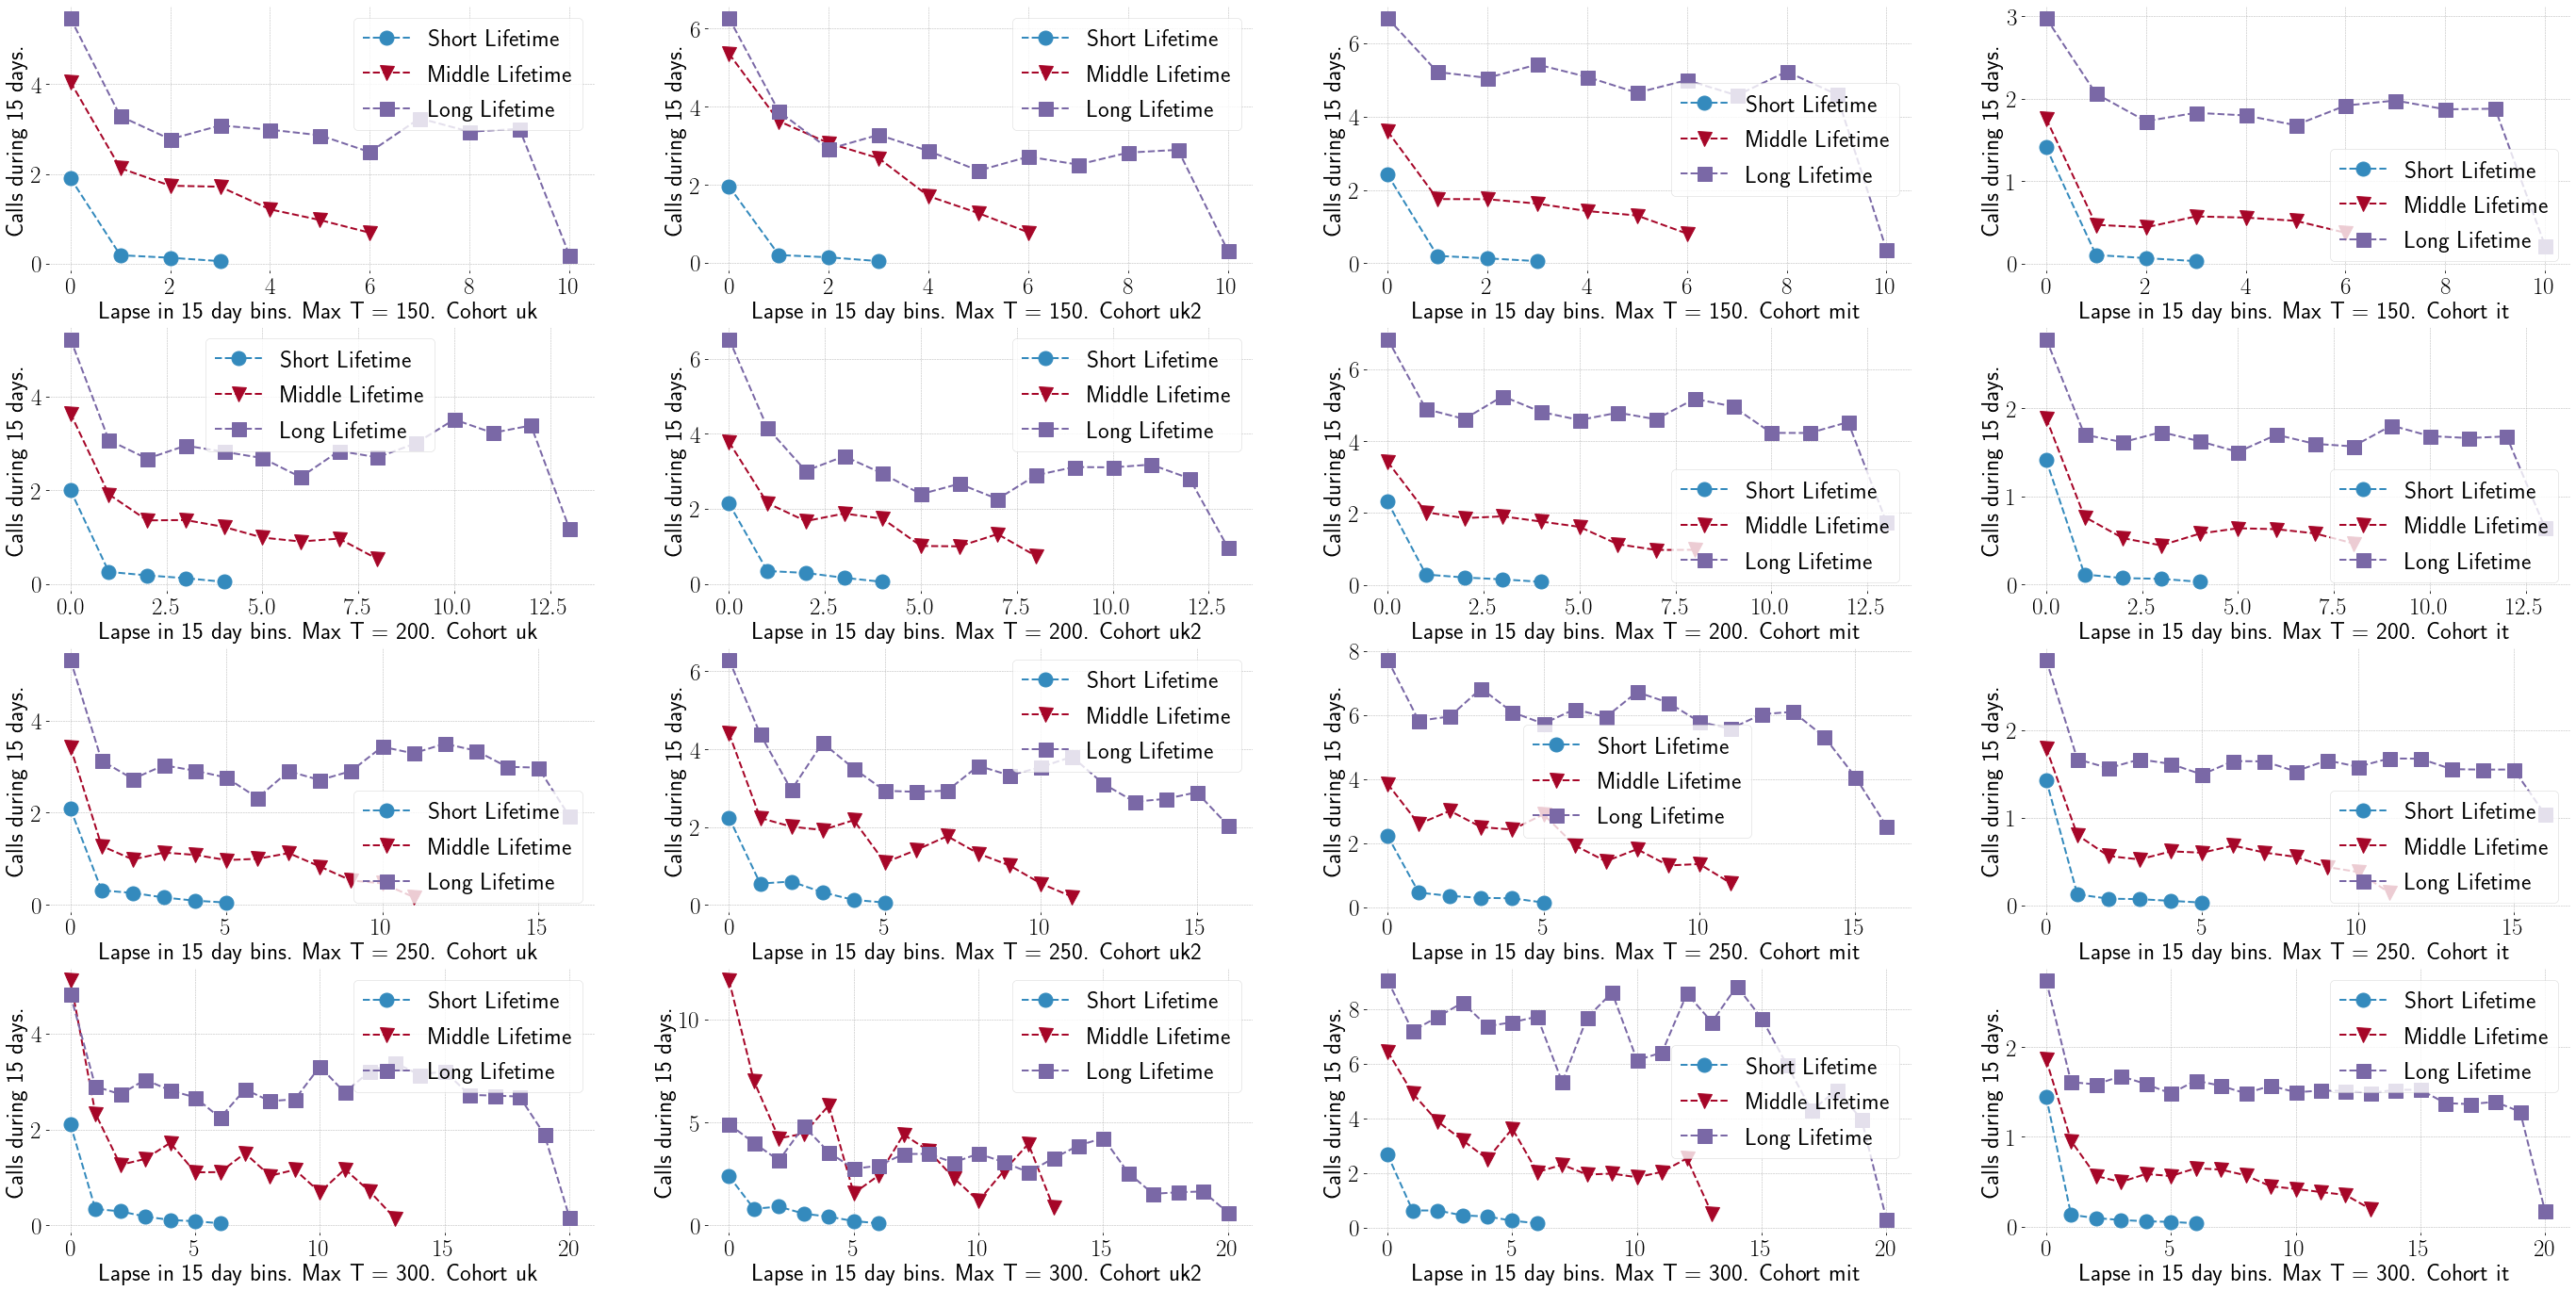

In [6]:
plt.figure(figsize=(48, 24))
labels = ['Short Lifetime', 'Middle Lifetime', 'Long Lifetime']
p = 1
for T in supA['uk'].keys():
    for c in supA.keys():
        plt.subplot(4,4,p)
        plt.xlabel(f"Lapse in 15 day bins. Max T = {T}. Cohort {c}")
        plt.ylabel(fr"Calls during 15 days.")
        for l in supA[c][T].keys():
            plt.plot(supA[c][T][int(l)].index, supA[c][T][l]['alpha'], marker=markers[int(l)], markersize=15, ls="--", label=labels[int(l)])
        plt.legend()
        p += 1

In [7]:
# for c in sup1.keys():
#     tmp = pd.DataFrame(index=list(range(21)))
#     for T in sup1[c].keys():
#         for lamb in sup1[c][T].keys():
#             df = sup1[c][T][lamb]
#             if lamb == 2:
#                 df = df.loc[df.index < list(df.index)[-1]] # To crop the last part of the longer lifetime series
#             df.columns = [f'T{T}l{int(lamb)}']
#             tmp = tmp.merge(df, left_index=True, right_index=True, how='outer')
#         tmp.index.rename('a', inplace=True)
#         tmp.fillna('nan', inplace=True)
#         tmp.to_csv(f"../commpatterns/PNAS_paper/SI/figs/SIa_{c}.dat", header=True, sep="\t")

## Changes in $\Delta a$ for fig 2

In [8]:
calls = {}
for c in callT.keys():
    calls[c] = callT[c][200]

In [9]:
supB = {}
for c in calls.keys():
    supB[c] = {}
    for Da in [7, 15, 30, 45]:
        dff = pc.get_f(calls[c], 'all', D, 67)
        b = pc.get_b(dff, 'alpha')
        supB[c][Da] = pc.plot_g(b, 'alpha')

NameError: name 'D' is not defined

In [ ]:
with open('../itdata/mtl_supB.pickle', 'rb') as handle:
    tmp = pickle.load(handle)
    handle.close()
    
supB['it'] = {}    
for Da in tmp.keys():
    b = pc.get_b(tmp[Da], 'alpha')
    supB['it'][Da] = pc.plot_g(b, 'alpha')

In [ ]:
plt.figure(figsize=(48, 24))
labels = ['Short Lifetime', 'Middle Lifetime', 'Long Lifetime']
p = 1
for Da in supB['uk'].keys():
    for c in supB.keys():
        plt.subplot(4,4,p)
        plt.xlabel(f"Lapse in {Da} day bins. Cohort {c}")
        plt.ylabel(fr"Calls during 15 days.")
        for l in supB[c][Da].keys():
            plt.plot(supB[c][Da][int(l)].index, supB[c][Da][l]['alpha'], marker=markers[int(l)], markersize=15, ls="--", label=labels[int(l)])
        plt.legend()
        p += 1

## Changes in $\Delta \ell$

The idea here is that, instead of producing three groups, I could get less or more for the plots in fig 2

In [ ]:
calls = {}
for c in callT.keys():
    calls[c] = callT[c][200]
    
supBB = {}
for c in calls.keys():
    supBB[c] = {}
    for series in [2,3,4,5]:
        gs = (200 // series) + 1
        dff = pc.get_f(calls[c], 'all', 15, gs)
        b = pc.get_b(dff, 'alpha')
        supBB[c][gs] = pc.plot_g(b, 'alpha')

In [ ]:
plt.figure(figsize=(32, 32))
p = 1
for gs in supBB['uk'].keys():
    for c in supBB.keys():
        plt.subplot(4,2,p)
        plt.xlabel(f"Lapse in 15 day bins. Cohort {c}")
        plt.ylabel(fr"Calls to each alter during 15 days.")
        for l in supBB[c][gs].keys():
            plt.plot(supBB[c][gs][int(l)].index, supBB[c][gs][l]['alpha'], marker=markers[int(l)], markersize=15, ls="--", label=f'Lifetime group {l}')
        plt.legend()
        p += 1

## Distribution of number of calls

In [ ]:
supC = {}
for c in callT.keys():
    supC[c] = {}
    df = callT[c][200]
    pp = pc.pairs(df)
    hist = pc.histogram(list(pp['nij']), 30)
    supC[c]['all'] = hist
    df1 = df.loc[(df['aclock'] >= 30) & (df['aclock'] <= 60)]
    pp = pc.pairs(df1)
    hist = pc.histogram(list(pp['nij']), 30)
    supC[c]['sub'] = hist

In [ ]:
with open('../itdata/mtl_supC.pickle', 'rb') as handle:
    supC['it'] = pickle.load(handle)
    handle.close()

In [ ]:
plt.figure(figsize=(32, 32))
p = 1
for c in supC.keys():
    for sample in supC[c].keys():
        plt.subplot(4,2,p)
        plt.xlabel(f"Number of calls. Cohort {c}")
        plt.ylabel(f"PMF {sample}")
        plt.loglog()
        df = supC[c][sample]
        plt.plot(df['label'], df['pmf'], "o-", markersize=13)
        p += 1

# Individual results for each cohort

In [ ]:
labels = ['Short Lives', 'Middle Lives', 'Long Lives']
uk2calls = filtered['uk2']
uk2dff = pc.get_f(uk2calls, 'all', 30, 67)
b = pc.get_b(uk2dff, 'alpha')
uk2stable = pc.plot_g(b, 'alpha')

plt.xlabel("Lapse")
plt.ylabel("b")
for lamb in uk2stable.keys():
    l = int(lamb)
    plt.plot([20 * x for x in uk2stable[l].index], uk2stable[l]['alpha'], marker=markers[l], markersize=15, label=labels[l])
plt.legend()

In [ ]:
calls = {}
for c in ['uk2', 'uk', 'mit']:    
    df = unfiltered[c].loc[unfiltered[c]['aclock'] <= 200]
#     if c != 'uk2':
#         une = df.groupby('ego')[['uclock']].min()
#         deux = pd.DataFrame()
#         for ego in df['ego'].unique():
#             tmp = df.loc[df['ego'] == ego]
#             minday = une.loc[ego]['uclock'] + 10
#             df1 = df.loc[df['uclock'] >= minday]
#             deux = deux.append(df1).reset_index(drop=True)
#         df = deux
    uno = pd.DataFrame()
    T = max(df['uclock'])
    for ego in df['ego'].unique():
        df1 = df.loc[df['ego'] == ego]
        for alter in df1['alter'].unique():
            df2 = df1.loc[df1['alter'] == alter]
            mint = min(df2['uclock'])
            if mint < (T - 200):
                df3 = df2.copy()
                df3['aclock'] = df2['uclock'] - mint
                uno = uno.append(df3).reset_index(drop=True)
    calls[c] = uno
    print(f"done with {c}")

In [ ]:
alldff = {}
for c in calls.keys():
    alldff[c] = pc.get_f(calls[c], 'all', 15, 67)
    
with open('../itdata/mtl_all_lambda_alpha_fig2.pickle', 'rb') as handle:
    alldff['it'] = pickle.load(handle)
    handle.close()

In [ ]:
alldff['it'][37]['c308ad2e46e9cb3c3f1af8737085d1e6']

In [ ]:
stablec = {}
for c in alldff.keys():
    b = pc.get_b(alldff[c], 'alpha')
    stablec[c] = pc.plot_g(b, 'alpha')

In [ ]:
stablec['it'].keys()

In [ ]:
plt.figure(figsize=(20, 32))
p = 1
labels = ['Short Lifetime', 'Middle Lifetime', 'Long Lifetime']
cohorts = ['UK2', 'UK', 'USA', 'Italy']
for c in ['uk', 'uk2', 'mit', 'it']:
    plt.subplot(4,1,p)
    plt.xlabel(f"Lapse in cohort {cohorts[p - 1]}")
    plt.ylabel(r"$\bar{f}$")
    plt.xticks(range(0, 201, 15))
    for lamb in stablec[c].keys():
        l = int(lamb)
        plt.plot([15 * x for x in stablec[c][l].index], stablec[c][l]['alpha'], marker=markers[l], ls="--", markersize=15, label=labels[l])
    plt.legend()
    p += 1
#     if p > 3:
#         break 
#plt.savefig("../commpatterns/img/supp/stablec.pdf", dpi=150)

In [ ]:
df0 = stablec['uk2'][0].loc[(stablec['uk2'][0].index >= 1) & (stablec['uk2'][0].index <= 4)]
print(np.mean(df0['alpha']))
df1 = stablec['uk2'][1].loc[(stablec['uk2'][1].index >= 1) & (stablec['uk2'][1].index <= 7)]
print(np.mean(df1['alpha']))
df2 = stablec['uk2'][2].loc[(stablec['uk2'][2].index >= 2) & (stablec['uk2'][2].index <= 12)]
print(np.mean(df2['alpha']))

In [ ]:
df0 = stablec['uk'][0].loc[(stablec['uk'][0].index >= 1) & (stablec['uk'][0].index <= 4)]
print(np.mean(df0['alpha']))
df1 = stablec['uk'][1].loc[(stablec['uk'][1].index >= 2) & (stablec['uk'][1].index <= 7)]
print(np.mean(df1['alpha']))
df2 = stablec['uk'][2].loc[(stablec['uk'][2].index >= 1) & (stablec['uk'][2].index <= 9)]
print(np.mean(df2['alpha']))

In [ ]:
df0 = stablec['mit'][0].loc[(stablec['mit'][0].index >= 1) & (stablec['mit'][0].index <= 4)]
print(np.mean(df0['alpha']))
df1 = stablec['mit'][1].loc[(stablec['mit'][1].index >= 2) & (stablec['mit'][1].index <= 5)]
print(np.mean(df1['alpha']))
df2 = stablec['mit'][2].loc[(stablec['mit'][2].index >= 1) & (stablec['mit'][2].index <= 12)]
print(np.mean(df2['alpha']))

In [ ]:
df0 = stablec['it'][0].loc[(stablec['it'][0].index >= 1) & (stablec['it'][0].index <= 4)]
print(np.mean(df0['alpha']))
df1 = stablec['it'][1].loc[(stablec['it'][1].index >= 1) & (stablec['it'][1].index <= 8)]
print(np.mean(df1['alpha']))
df2 = stablec['it'][2].loc[(stablec['it'][2].index >= 2) & (stablec['it'][2].index <= 12)]
print(np.mean(df2['alpha']))

In [ ]:
for c in stablec.keys():
    for l in stablec[c].keys():
        print(l, pc.get_plateau(stablec[c][l], 0.8))
    print("=======================================")

In [ ]:
# for c in stablec.keys():
#     tmp = pd.DataFrame()
#     for l in stablec[c].keys():
#         df = stablec[c][l]
#         df.columns = [f'l{int(l)}']
#         if len(tmp) == 0:
#             tmp = tmp.append(df)
#         else:
#             tmp = tmp.merge(df, left_index=True, right_index=True, how='outer')
#     tmp.index.rename('a', inplace=True)
#     tmp.fillna('nan', inplace=True)
#     tmp.to_csv(f"../commpatterns/PNAS_paper/figs/fig2c_{c}.dat", header=True, sep="\t")

In [ ]:
# t0 = dt.datetime.now()
# bplots = {}
# for c in calls.keys():
#     bplots[c] = {}
#     for Dl in range(40, 71, 5):
#         dff = pc.get_f(calls[c], 'all', 10, Dl)
#         b = pc.get_b(dff, 'alpha')
#         bplots[c][Dl] = pc.plot_g(b, 'alpha')

# plateaus = {}
# platplot = {}
# for c in calls.keys():
#     plateaus[c] = {}
#     for Dl in [60, 65, 70]:
#         for lamb in bplots[c][Dl].keys():
#             ell = int((lamb + 0.5) * Dl)
#             if ell not in plateaus[c].keys():
#                 xmin, xmax, height = pc.get_plateau(bplots[c][Dl][lamb], 0.8)
#                 plateaus[c][ell] = height
    
#     platplot[c] = pd.DataFrame.from_dict(plateaus[c], orient='index').sort_index()
# print(f'This block took {dt.datetime.now() - t0}')

In [ ]:
# plt.figure(figsize=(20,30))
# p = 1
# for c in platplot.keys():
#     plt.subplot(4,1,p)
#     plt.plot(platplot[c].index, platplot[c][0], "o-", markersize=15)
#     p += 1

In [ ]:
# tmp = pd.DataFrame()
# tmp['ell'] = list(platplot['uk'].index)
# for c in platplot.keys():
#     tmp[f'{c}'] = list(platplot[c][0])
# tmp.to_csv("../commpatterns/PNAS_paper/figs/inset2b.dat", header=True, index=False, sep="\t")

In [ ]:
# platplot['uk2'][0]

In [ ]:
alldff2 = {}
for c in calls.keys():
    alldff2[c] = pc.get_f(calls[c], 'all', 30, 10)
    
with open('../itdata/mtl_all_lambda_alpha_fig3.pickle', 'rb') as handle:
    alldff2['it'] = pickle.load(handle)
    handle.close()
        
survc = {}
for c in alldff2.keys():
    survc[c] = pc.get_survival(alldff2[c])

In [ ]:
plt.figure(figsize=(20, 30))
p = 1
for c in survc.keys():
    plt.subplot(4, 1, p)
    plt.xlabel(f"Lifetime for cohort {cohorts[p - 1]}")
    plt.ylabel("Survival Probability")
    df = survc[c]
    for gamma in range(5):
        plt.plot([10 * x for x in df[gamma].index], df[gamma][0], marker=markers[gamma], markersize=13, ls="--", lw=3, label=fr'$\gamma = {gamma}$')
    plt.legend()
    p += 1
#plt.savefig("../commpatterns/img/supp/survc.pdf", dpi=150)

In [ ]:
# for c in survc.keys():
#     tmp = pd.DataFrame({'lc': list(survc[c][0].index)})
#     for s in range(5):
#         df = survc[c][s]
#         tmp[f'p{int(s)}'] = df[0]
#     tmp.to_csv(f'../commpatterns/PNAS_paper/SI/figs/s4_{c}.dat', header=False, index=False, sep="\t")

For all cohorts combined:

In [ ]:
alldff2['all'] = {}
for c in ['uk', 'mit', 'it']:
    alldff2['all'].update(alldff2[c])
    
len(alldff2['all']) == len(alldff2['uk']) + len(alldff2['mit']) + len(alldff2['it'])

In [ ]:
survall = pc.get_survival(alldff2['all'])

In [ ]:
plt.xlabel(f"Lifetime ")
plt.ylabel("Survival Probability")
df = survall
for gamma in range(5):
    plt.plot([10 * x for x in df[gamma].index], df[gamma][0], marker=markers[gamma], markersize=13, ls="--", lw=3, label=fr'$\gamma = {gamma}$')
plt.legend()

In [ ]:
# tmp = pd.DataFrame({'lc': list(survall[0].index)})
# for s in range(5):
#     df = survall[s]
#     tmp[f'p{int(s)}'] = df[0]
# tmp.to_csv(f'../commpatterns/PNAS_paper/SI/figs/s4_{c}.dat', header=False, index=False, sep="\t")

Contours and Survival points for figure 4

In [ ]:
dffUM = {}
for c in ['uk', 'mit']:
    dffUM.update(alldff2[c])

In [ ]:
surv_cont = pc.get_survival(dffUM)

In [ ]:
plt.xlabel(f"Lifetime ")
plt.ylabel("Survival Probability")
df = surv_cont
for gamma in range(5):
    plt.plot([10 * x for x in df[gamma].index], df[gamma][0], marker=markers[gamma], markersize=13, ls="--", lw=3, label=fr'$\gamma = {gamma}$')
plt.legend()

In [ ]:
# tmp = pd.DataFrame()
# for s in range(6):
#     df = surv_cont[s].reset_index()
#     df.columns = ['lc', 'p']
#     df['lc'] *= 10
#     df['f'] = 2**s
#     ttmmpp = pd.DataFrame({'x': df['f'], 'y': df['lc'], 'z': df['p']})
#     tmp = tmp.append(ttmmpp).reset_index(drop=True)
# tmp.to_csv(f"../commpatterns/data/contour.dat", header=False, index=False, sep="\t")

In [ ]:
points_it = pc.get_survival(alldff2['it'], unbinned=True)

In [ ]:
points_it.keys()

In [ ]:
tmp = pd.DataFrame()
for s in points_it.keys():
    if s <= 2**5 + 1:
        df = points_it[s].reset_index()
        df.columns = ['lc', 'p']
        df['lc'] *= 10
        df['f'] = s
        ttmmpp = pd.DataFrame({'x': df['f'], 'y': df['lc'], 'z': df['p']})
        tmp = tmp.append(ttmmpp).reset_index(drop=True)
sub = [(i/4, (i + 1)/4) for i in range(4)]
p = 0
for s in sub:
    df = tmp.loc[(tmp['z'] > s[0]) & (tmp['z'] <= s[1])]
    df.drop(columns='z', inplace=True)
    df.to_csv(f'../commpatterns/data/points{p}.dat', header=False, index=False, sep="\t")
    print(s)
    p += 1

In [ ]:
tmp

# Interevent times for each cohort

Consider this needs to be updated after the new filters (i.e. including the first 30 days of phone calls). Just to document the way I will compute the interevent times:

1. For each ego-alter pair, obtain the time (in days) between each phone call. Generate a list with the interevent times.
2. For each ego, average the coefficients of variation and put them into a cohort list
3. For each cohort, I should have a list of size equal to the number of egos, with all of the average coefficients of variation. Once again, if I take the average I will get the coefficient of variation for the cohort.

I can try a slight variation of this by not doing step 2 and get an average for all ego-alter pairs in the cohort. I can try to identify differences in both methods.

In [ ]:
# ie = {}
# df = calls
# for ego in df['ego'].unique():
#     df1 = df.loc[df['ego'] == ego]
#     elllist = df1.groupby('alter')[['aclock']].max()
#     for alter in df1['alter'].unique():
#         lamb = elllist['aclock'][alter] // 67
#         df2 = df1.loc[df1['alter'] == alter]
#         ie[lamb] = ie.get(lamb, [])
#         ielist = list(df2['aclock'].diff())[1:]
#         if len(ielist) > 2:
#             cvar = np.nanstd(ielist) / np.nanmean(ielist)
#             if not pd.isna(cvar):
#                 ie[lamb].append(cvar)

In [ ]:
def get_ietimes(callsdf, Deltaell = 67):
    df = callsdf
    iebyego = {}
    ieegoalter = {}
    ieegoalter['all'] = []
    for ego in df['ego'].unique():
        df1 = df.loc[df['ego'] == ego]
        elllist = df1.groupby('alter')[['aclock']].max()
        iebyego[ego] = {}
        iebyego[ego]['all'] = []
        for alter in df1['alter'].unique():
            lamb = elllist['aclock'][alter] // Deltaell
            df2 = df1.loc[df1['alter'] == alter]
            df2 = df2.sort_values(by='aclock')
            ielist = list(df2['aclock'].diff())[1:]
            ieegoalter[lamb] = ieegoalter.get(lamb, [])
            if (len(ielist) > 2) and (np.nanmean(ielist) != 0):
                cvar = np.nanstd(ielist) / np.nanmean(ielist)
                if not pd.isna(cvar):
                    ieegoalter[lamb].append(cvar)
                    ieegoalter['all'].append(cvar)
                    iebyego[ego][lamb] = iebyego[ego].get(lamb, [])
                    iebyego[ego][lamb].append(cvar)
                    iebyego[ego]['all'].append(cvar)
    result = {}
    result['byego'] = iebyego
    result['egoalter'] = {}
    for lamb in ieegoalter.keys():
        result['egoalter'][lamb] = ieegoalter[lamb]
    return result

In [ ]:
# def get_ietimes(callsdf, Deltaell = 67):
#     df = callsdf
#     iebyego = {}
#     ieegoalter = {}
#     ieegoalter['all'] = []
#     for ego in df['ego'].unique():
#         df1 = df.loc[df['ego'] == ego]
#         elllist = df1.groupby('alter')[['aclock']].max()
#         iebyego[ego] = {}
#         iebyego[ego]['all'] = []
#         for alter in df1['alter'].unique():
#             lamb = elllist['aclock'][alter] // Deltaell
#             df2 = df1.loc[df1['alter'] == alter]
#             df2 = df2.sort_values(by='aclock')
#             ielist = list(df2['aclock'].diff())[1:]
#             ieegoalter[lamb] = ieegoalter.get(lamb, [])
#             if len(ielist) > 2:
#                 cvar = np.nanstd(ielist) / np.nanmean(ielist)
#                 if not pd.isna(cvar):
#                     ieegoalter[lamb].append(cvar)
#                     ieegoalter['all'].append(cvar)
#                     iebyego[ego][lamb] = iebyego[ego].get(lamb, [])
#                     iebyego[ego][lamb].append(cvar)
#                     iebyego[ego]['all'].append(cvar)
#     result = {}
#     result['byego'] = iebyego
#     result['egoalter'] = {}
#     for lamb in ieegoalter.keys():
#         result['egoalter'][lamb] = ieegoalter[lamb]
#     return result

In [ ]:
iedata = {}
for c in calls.keys():
    iedata[c] = get_ietimes(calls[c])

In [ ]:
# with open('../itdata/ie_mtl1.pickle', 'rb') as handle:
#     iedata['it1'] = pickle.load(handle)
#     handle.close()
    
# with open('../itdata/ie_mtl2.pickle', 'rb') as handle:
#     iedata['it2'] = pickle.load(handle)
#     handle.close()
    
with open('../itdata/ie_mtl_all.pickle', 'rb') as handle:
    iedata['it'] = pickle.load(handle)
    handle.close()

In [ ]:
iedata.keys()

In [ ]:
for c in iedata.keys():
    thelist = iedata[c]['egoalter']['all']
    print(c, np.mean(thelist), np.std(thelist))

In [ ]:
for c in iedata.keys():
    thelist = []
    data = iedata[c]['byego']
    for ego in data.keys():
        acv = np.mean(data[ego]['all'])
        thelist.append(acv)
    print(len(thelist))
    print(c, np.nanmean(thelist), np.nanstd(thelist))

In [ ]:
ieH = {}
for c in iedata.keys():
    ieH[c] = {}
    ieH[c]['byego'] = {}
    data = iedata[c]['byego']
    for ego in data.keys():
        data2 = data[ego]
        for k in data2.keys():
            ieH[c]['byego'][k] = ieH[c]['byego'].get(k, [])
            ieH[c]['byego'][k].append(np.nanmean(data2[k]))
    ieH[c]['egoalter'] = {}
    for k in [0, 1, 2, 'all']:
        dat = [x for x in ieH[c]['byego'][k] if not pd.isna(x)]
        ieH[c]['byego'][k] = dat
        ieH[c]['egoalter'][k] = iedata[c]['egoalter'][k]
ieH['all'] = {}
for t in ['byego', 'egoalter']:
    ieH['all'][t] = {}
    for k in [0, 1, 2, 'all']:
        for c in ['uk', 'mit', 'it']:
            ieH['all'][t][k] = ieH['all'][t].get(k, [])
            ieH['all'][t][k] += ieH[c][t][k]
            
for c in ieH.keys():
    for t in ieH[c].keys():
        for k in ieH[c][t].keys():
            ieH[c][t][k] = (np.nanmean(ieH[c][t][k]), pc.histogram(ieH[c][t][k], 30, log=False), len(ieH[c][t][k]))

In [ ]:
plt.figure(figsize=(32, 32))
labels = ['Short Lifetime', 'Middle Lifetime', 'Long Lifetime', 'All Lifetime']
p = 1
for c in ['uk', 'mit', 'it', 'all']:
    for t in ['byego', 'egoalter']:
        plt.subplot(4,2,p)
        if t == 'egoalter':
            plt.xlim(-0.5, 15.5)
        else:
            plt.xlim(0.5, 4)
        plt.xlabel(f"CV {c} {t}")
        plt.ylabel("PMF")
        lab = 0
        for k in [0, 1, 2, 'all']:
            plt.plot(ieH[c][t][k][1]['label'], ieH[c][t][k][1]['pmf'], marker=markers[lab], markersize=13, ls="--", label=f'{labels[lab]} ({ieH[c][t][k][0]:.2f}) n = {ieH[c][t][k][2]}')
            lab += 1
        plt.legend()
        p += 1

# Mutual Information

Needs to be recalculated with the updates in the data

In [ ]:
alldff2.keys()

In [ ]:
calls.keys()

In [ ]:
lives = {}
for c in calls.keys():
    lives[c] = pc.lives_dictionary(calls[c])

with open('../itdata/mtl_all_lives.pickle', 'rb') as handle:
    tmp = pickle.load(handle)
    lives['it'] = tmp['all']
    handle.close()

lives['all'] = {}
for c in lives.keys():
    lives['all'].update(lives[c])

In [ ]:
lives.keys()

In [ ]:
def get_month2(dff, lives):
    result = pd.DataFrame()
    idx = 0
    for ego in dff.keys():
        for alter in dff[ego].keys():
            df = dff[ego][alter].loc[dff[ego][alter]['alpha'] == 1]
            if (len(df) > 0) and (ego in lives.keys()):
                result.at[idx, 'ego'] = ego
                result.at[idx, 'alter'] = alter
                result.at[idx, 'F'] = sum(df['f'])
                result.at[idx, 'lambda'] = lives[ego][alter]['ell']
                idx += 1
    return result

miall = []
for i in lives.keys():
    miall.append(get_month2(alldff2[i], lives[i]))

In [ ]:
import sklearn.metrics as sk
miplot = []
for i in miall:
    miplot.append(sk.mutual_info_score(i['F'], i['lambda']))
for i in range(len(miplot)):
    print(list(lives.keys())[i],"\t", miplot[i],"\t", miplot[i]*1.44)